<a href="https://colab.research.google.com/github/Godkimchiy/Long-and-short-of-it/blob/master/intern0205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


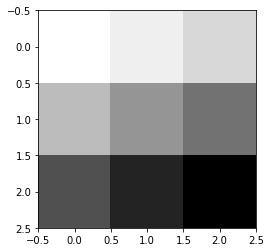

In [11]:
# Making matrix & visulization for sample input image 

sess = tf.InteractiveSession()
image = np.array([
    [[[1],[2],[3]],
     [[4],[5],[6]],
     [[7],[8],[9]]]], dtype=np.float32
)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys') # shape을 보면 알듯이 reshape안해주면 에러난다.

shape of Image :  (1, 3, 3, 1)
shape of weight :  (2, 2, 1, 1)
shape of conv2d_img :  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


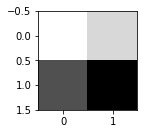

In [12]:
# 1 filter (2,2,1,1) with paddding: VALID
# weight.shape = 1filter(2,2,1,1) 2x2필터 
# output after filtering image with filter(conv2d)

print("shape of Image : ", image.shape)
weight = tf.constant([
                      [[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]         
                      ]) # filter의 weight를 임의의로 설정해준다.
print("shape of weight : ",weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("shape of conv2d_img : ",conv2d_img.shape) # image의 와 shape가 맞지 않다.
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 행렬의 두 축을 바꿔서 image와 shape를 맞춘다.

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(2,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='Greys')

일반적으로 입출력 사이즈를 같게하기 위해 padding = 'same' 조건을 두고 필터링을 거친다. 이번에는 conv2d layer(filter)를 거치면서 입출력의 사이즈도 동일하게 유지할 것이다

shape of image is  (1, 3, 3, 1)
shape of weight is  (2, 2, 1, 1)
shape of conv2d_img is  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


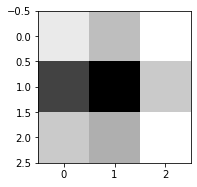

In [13]:
print("shape of image is ", image.shape)

weight = tf.constant([
                      [[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]
])

print("shape of weight is ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("shape of conv2d_img is ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0,3)

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='Greys')

출력된 것을 보면 왼쪽상단 2x2는 위에서 구한것과 같고, padding으로 사이즈에 맞게 추가된 부분은 밝은 것으로 보아 0값들로 채워졌다는 것을 다시 한 번 확인할 수 있다.

이제는 필터를 세 개를 사용해 볼 것이다. weight의 shape에서 값을 늘려주면 되는데 이는 color 사진의 경우를 다룰 때 활용된다. Input 이미지가 (3x3) x3(r,g,b 각각 하나씩) 이러한 배열로 구성되기 때문이다.

shape of image is  (1, 3, 3, 1)
shape of weight is  (2, 2, 1, 3)
shape of conv2d_img is  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


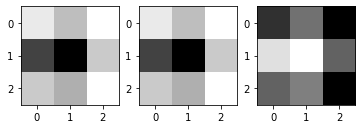

In [0]:
print("shape of image is ", image.shape)

weight = tf.constant([
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]
                      ])
print("shape of weight is ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("shape of conv2d_img is ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='Greys')

# **Subsampling Image Data - MaxPooling**

2x2 filter & stride 2


In [0]:
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
print(pool.shape)
print(pool.eval())


(1, 2, 2, 1)
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]]


# **MNIST 이미지로 확인해보기**

In [14]:
# 데이터 불러오기.
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


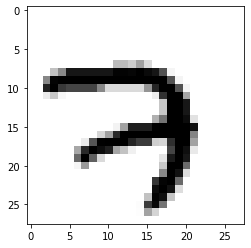

In [15]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap = 'Greys')

In [20]:
img = img.reshape(-1,28,28,1) # -1 은 3차원 데이터의 개수를 무제한으로 한다는 말. 28x28 크기의 흑백(1) 이미지의 형태로 변환시킨다.
w1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01)) # conv layer filter에 가중치 배정. 3x3, 흑백(1), filter 5개
conv2d = tf.nn.conv2d(img, w1, strides = [1,2,2,1], padding = 'SAME') # 필터가 2칸씩 이동 이미지를 필터링 한다. 5개의 필터가 있기때문에 결과가 5개다.

print(conv2d)

Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


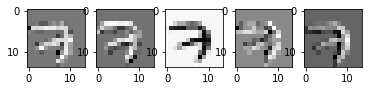

In [21]:
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0,3)

for i, one_img in enumerate(conv2d_img):
  plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='Greys')
  # weight 가 랜덤으로 배정되어 필터가 5개가 주어졌으니 각 필터에 대한 결과도 이렇게 다르다.

## **MNIST Max Pooling**

---



In [22]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # same 이지만 strides가 2x2 이므로 출력 사이즈가 작아진다.
print(pool)

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


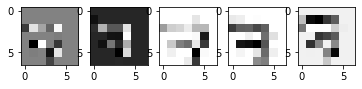

In [24]:
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0,3)

for i, one_img in enumerate(pool_img):
  plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='Greys')